In [1]:
import string
import spacy
spacy_nlp = spacy.load("en_core_web_sm")
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
import utility_functions as utils
import importlib
import pandas as pd
from collections import defaultdict
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from transformers import pipeline
from tqdm import tqdm
import seaborn as sns

importlib.reload(utils)

custom_stop_words = list(STOP_WORDS)  # Existing stop words
custom_stop_words.extend(["ll", "ve", "'em", "em", "ho", "fo", "ah", "de"])  # Tokens which doesn't really make sense to hav`e them.

/Users/borosabel/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
df = pd.read_excel('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Excel/baseline_w_topics_w_entity.xlsx', engine='openpyxl')
_df = pd.read_excel('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Excel/baseline_data.xlsx', engine='openpyxl')

In [148]:
df['Lyrics'] = _df['Lyrics'].apply(utils.cleanup_entity_rec)

In [149]:
# Initialize the NER pipeline
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")

def extract_entities(text):
    entities = ner_pipeline(text)
    return [{'entity': entity['word'], 'type': entity['entity_group'], 'score': entity['score']} for entity in entities]

tqdm.pandas(desc="Extracting entities")
df['Named_Entities'] = df['Lyrics'].progress_apply(extract_entities)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Extracting entities: 100%|██████████| 1360/1360 [58:23<00:00,  2.58s/it] 


In [10]:
city_to_state_mapping = {
    'New York': ['Bronx', 'Brooklyn', 'Coney Island', 'Harlem', 'Manhattan', 'Queens', 'Staten Island', 'Upper East Side', 'Bed-Stuy', 'Bedford-Stuyvesant', 'Bushwick', 'Kings County', 'Williamsburg', 'East Village', 'Fifth Avenue', 'Lower East Side', 'Meatpacking District', 'SoHo', 'Tribeca', 'Union Square', 'West Village'],
    'California': ['Los Angeles', 'San Francisco', 'Oakland', 'Sacramento', 'San Diego', 'San Jose', 'Fresno', 'Santa Monica', 'Hollywood', 'Beverly Hills', 'Long Beach', 'Malibu', 'Napa Valley', 'Palm Springs', 'Santa Barbara', 'Silicon Valley', 'Venice Beach', 'West Hollywood'],
    'Texas': ['Austin', 'Dallas', 'Houston', 'San Antonio', 'Fort Worth', 'El Paso'],
    'Florida': ['Miami', 'Orlando', 'Tampa', 'Jacksonville', 'Fort Lauderdale', 'Tallahassee', 'West Palm Beach'],
    'Illinois': ['Chicago'],
    'Georgia': ['Atlanta', 'Savannah'],
    'New Jersey': ['Newark', 'Jersey City', 'Hoboken', 'Atlantic City', 'Paterson'],
    'Pennsylvania': ['Philadelphia', 'Pittsburgh', 'Harrisburg'],
    'Massachusetts': ['Boston', 'Cambridge', 'Worcester', 'Springfield'],
    'Nevada': ['Las Vegas', 'Reno'],
    'Washington': ['Seattle', 'Spokane', 'Tacoma'],
    'Arizona': ['Phoenix', 'Tucson'],
    'Michigan': ['Detroit', 'Ann Arbor'],
    'Ohio': ['Cleveland', 'Cincinnati', 'Columbus', 'Akron'],
    'North Carolina': ['Charlotte', 'Raleigh', 'Durham'],
    'South Carolina': ['Charleston', 'Columbia'],
    'Virginia': ['Richmond', 'Virginia Beach', 'Arlington', 'Norfolk'],
    'Maryland': ['Baltimore', 'Annapolis'],
    'Colorado': ['Denver', 'Colorado Springs'],
    'Louisiana': ['New Orleans', 'Baton Rouge'],
    'Alabama': ['Birmingham', 'Montgomery'],
    'Tennessee': ['Nashville', 'Memphis'],
    'Kentucky': ['Louisville', 'Lexington'],
    'Missouri': ['St. Louis', 'Kansas City'],
    'Minnesota': ['Minneapolis', 'St. Paul'],
    'Oregon': ['Portland', 'Eugene'],
    'Indiana': ['Indianapolis', 'Fort Wayne'],
    'Iowa': ['Des Moines'],
    'Kansas': ['Wichita'],
    'Nebraska': ['Omaha', 'Lincoln'],
    'New Mexico': ['Albuquerque'],
    'Oklahoma': ['Oklahoma City', 'Tulsa'],
    'Arkansas': ['Little Rock'],
    'Connecticut': ['Hartford', 'New Haven'],
    'Rhode Island': ['Providence'],
    'Maine': ['Portland', 'Augusta'],
    'New Hampshire': ['Manchester', 'Concord'],
    'Vermont': ['Burlington', 'Montpelier'],
    'Idaho': ['Boise'],
    'Montana': ['Billings'],
    'Wyoming': ['Cheyenne'],
    'South Dakota': ['Sioux Falls'],
    'North Dakota': ['Fargo'],
    'West Virginia': ['Charleston']
}

In [4]:
# df.to_pickle('df_w_entity_w_emotions.pkl')
df = pd.read_pickle('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Excel/df_w_entity_w_emotions.pkl')

In [110]:
with open('corpus_entity.txt', 'w', encoding='utf-8') as file:
    for lyrics in df['Lyrics']:
        if pd.notna(lyrics):
            file.write(lyrics + '\n')

In [5]:
topics0 = df[df['Topic Model Index'] == 0]['Topic Model'].iloc[0]
topics1 = df[df['Topic Model Index'] == 1]['Topic Model'].iloc[0]

In [6]:
df

,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,Lyrics,Topic Model,Named_Entities,Topic Model Index,joy,anger,sadness,fear,love,surprise
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,"Yo My crew is in the house Terra, Herb McGruff...","['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Terra', 'type': 'PER', 'score': 0...",1,0.391312,0.322842,0.031455,0.240503,0.006392,0.007497
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,It's the number one crew in the area. Big L be...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Big', 'type': 'PER', 'score': 0.5...",1,0.589780,0.064791,0.007301,0.007067,0.328468,0.002593
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,There are too many MC's who are overrated You ...,"['rhyme', 'cuz', 'soul', 'rhythm', 'stage', 'l...","[{'entity': 'L', 'type': 'PER', 'score': 0.571...",0,0.118868,0.243809,0.593209,0.038575,0.003464,0.002075
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,Let me get to the point real quick When ya poc...,"['rhyme', 'cuz', 'soul', 'rhythm', 'stage', 'l...","[{'entity': 'Benz', 'type': 'MISC', 'score': 0...",0,0.994099,0.002589,0.001196,0.000524,0.000969,0.000623
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,A yo spark up the phillies and pass the stout ...,"['rhyme', 'cuz', 'soul', 'rhythm', 'stage', 'l...","[{'entity': 'L', 'type': 'PER', 'score': 0.444...",0,0.164897,0.818634,0.005583,0.004752,0.003524,0.002610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Dr.Dre,The Chronic,Dr. Dre - The Day the Niggaz Took Over (feat. ...,west_coast,1992,93.750000,46.875000,273.206000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,This is dedicated to the niggas that was down ...,"['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Soul Kitchen', 'type': 'ORG', 'sc...",1,0.306460,0.661105,0.022412,0.005062,0.003681,0.001280
1356,Dr.Dre,The Chronic,"Dr. Dre - Bitches Ain't Shit (feat. Jewell, Sn...",west_coast,1992,92.307692,46.153846,287.207625,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,"Dead! Ha ha, mighty Aftermath Whose soul ever ...","['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Dr', 'type': 'PER', 'score': 0.79...",1,0.638882,0.312282,0.033750,0.009971,0.003279,0.001837
1357,Dr.Dre,The Chronic,Dr. Dre - Stranded On Death Row (feat. Bushwic...,west_coast,1992,90.909091,45.801527,287.335333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,"Bitch! Eeeh, wha'ppen nuh baby You look good i...","['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Dr', 'type': 'PER', 'score': 0.80...",1,0.121620,0.648577,0.018858,0.203552,0.003240,0.004152
1358,Dr.Dre,The Chronic,Dr. Dre - Nuthin' but a ＂G＂ Thang (feat. Snoop...,west_coast,1992,95.238095,47.244094,238.677917,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,"Let me call this old bitch, see what this bitc...","['nigga', 'shit', 'ride', 'dick', 'bitch', 'di...","[{'entity': 'Compton G', 'type': 'PER', 'score...",1,0.220978,0.716446,0.041098,0.014734,0.004774,0.001970


In [74]:
df_east = df[df['Coast'] == 'east_coast'].reset_index(drop=True)
df_west = df[df['Coast'] == 'west_coast'].reset_index(drop=True)

df_east_1 = df_east[df_east['Topic Model Index'] == 0].reset_index(drop=True)
df_east_2 = df_east[df_east['Topic Model Index'] == 1].reset_index(drop=True)
# df_east_3 = df_east[df_east['Topic Model Index'] == 2]
# df_east_4 = df_east[df_east['Topic Model Index'] == 3]

df_west_1 = df_west[df_west['Topic Model Index'] == 0].reset_index(drop=True)
df_west_2 = df_west[df_west['Topic Model Index'] == 1].reset_index(drop=True)
# df_west_3 = df_west[df_west['Topic Model Index'] == 2]
# df_west_4 = df_west[df_west['Topic Model Index'] == 3]

In [87]:
def populate_entities_by_type(df):
    entities_by_type = defaultdict(list)
    entity_indices = defaultdict(list)

    for index, (entities, artist) in enumerate(zip(df['Named_Entities'], df['Artist'])):
        if isinstance(entities, list):
            for entity in entities:
                if entity['score'] > 0.7:
                    mapped_entity = map_city_to_state(entity['entity'], city_to_state_mapping)
                    entities_by_type[entity['type']].append(mapped_entity)
                    entity_indices[(mapped_entity, artist)].append(index)

    return entities_by_type, entity_indices

def find_entries_containing_entities(df, entity_indices, search_entities):
    # Collect indices of rows that contain the search entities
    matching_indices = set()
    for entity in search_entities:
        for (ent, artist), indices in entity_indices.items():
            if ent == entity:
                matching_indices.update(indices)

    # Ensure matching_indices are valid
    matching_indices = list(matching_indices)
    matching_indices = [idx for idx in matching_indices if idx in df.index]

    # Create a subset of the DataFrame with the matching rows
    subset_df = df.loc[matching_indices]

    return subset_df

def extract_context_from_lyrics(df, entity, window=3):
    context_info = []

    # Iterate through the DataFrame
    for index, row in df.iterrows():
        lyrics = row['Lyrics']
        song_name = row['Song']
        artist = row['Artist']
        # Tokenize the lyrics into words
        words = lyrics.split()
        # Find the entity in the words list and extract context
        for i, word in enumerate(words):
            if word == entity:
                start = max(i - window, 0)
                end = min(i + window + 1, len(words))
                context = words[start:end]
                context_info.append({
                    'Song_Name': song_name,
                    'Artist': artist,
                    'Context': ' '.join(context)
                })

    return context_info

def postprocess_mapping(entities_by_type, entity_indices, mapping):
    updated_entities_by_type = defaultdict(list)
    updated_entity_indices = defaultdict(list)

    for entity_type, entities in entities_by_type.items():
        for entity in entities:
            new_entity = entity
            if entity in mapping.get(entity_type, {}):
                for (ent, artist), indices in entity_indices.items():
                    if ent == entity and artist in mapping[entity_type][entity]:
                        new_entity = mapping[entity_type][entity][artist]
                        break
            updated_entities_by_type[entity_type].append(new_entity)

            for (ent, artist), indices in entity_indices.items():
                if ent == entity:
                    updated_entity_indices[(new_entity, artist)].extend(indices)

    return updated_entities_by_type, updated_entity_indices

def map_city_to_state(entity, city_to_state_mapping):
    for state, cities in city_to_state_mapping.items():
        if entity in cities:
            return state
    return entity

In [76]:
entities_by_type_east, entity_indices_east = populate_entities_by_type(df_east)
entities_by_type_east_1, entity_indices_east_1 = populate_entities_by_type(df_east_1)
entities_by_type_east_2, entity_indices_east_2 = populate_entities_by_type(df_east_2)
# entities_by_type_east_3 = populate_entities_by_type(df_east_3)
# entities_by_type_east_4 = populate_entities_by_type(df_east_4)

entities_by_type_west, entity_indices_west = populate_entities_by_type(df_west)
entities_by_type_west_1, entity_indices_west_1 = populate_entities_by_type(df_west_1)
entities_by_type_west_2, entity_indices_west_2 = populate_entities_by_type(df_west_2)
# entities_by_type_west_3 = populate_entities_by_type(df_west_3)
# entities_by_type_west_4 = populate_entities_by_type(df_west_4)

In [77]:
# Since there are a lot of entities with only one letter let's figure out what the fuck are they?
entities_by_type, entity_indices = populate_entities_by_type(df_east)
entity_to_search = 'York'
subset_df = find_entries_containing_entities(df_east, entity_indices, [entity_to_search])
context_words = extract_context_from_lyrics(subset_df, entity_to_search, window=5)

for context in context_words:
    print(f"Context for entity '{entity_to_search}': {context}")

Context for entity 'York': {'Song_Name': 'Sophisticated Bitch.mp3', 'Artist': 'Public Enemy', 'Context': "more power than the New York Yanks If Miuzi wasn't heavy"}
Context for entity 'York': {'Song_Name': 'Sophisticated Bitch.mp3', 'Artist': 'Public Enemy', 'Context': 'Enemy number one in New York Public Enemy number one in'}
Context for entity 'York': {'Song_Name': 'Wu-Tang： 7th Chamber - Part II (Conclusion).mp3', 'Artist': 'Wu Tang Clan', 'Context': 'Come and get your New York Post New York Post right'}
Context for entity 'York': {'Song_Name': 'Wu-Tang： 7th Chamber - Part II (Conclusion).mp3', 'Artist': 'Wu Tang Clan', 'Context': 'your New York Post New York Post right here Come on'}
Context for entity 'York': {'Song_Name': 'Wu-Tang： 7th Chamber - Part II (Conclusion).mp3', 'Artist': 'Wu Tang Clan', 'Context': 'stubost stubost Coasta coasta New York Post Yo New York Post'}
Context for entity 'York': {'Song_Name': 'Wu-Tang： 7th Chamber - Part II (Conclusion).mp3', 'Artist': 'Wu Tang

In [91]:
# Since there are a lot of entities with only one letter let's figure out what the fuck are they?
entities_by_type, entity_indices = populate_entities_by_type(df_west)
entity_to_search = 'York'
subset_df = find_entries_containing_entities(df_west, entity_indices, [entity_to_search])
context_words = extract_context_from_lyrics(subset_df, entity_to_search, window=5)

for context in context_words:
    print(f"Context for entity '{entity_to_search}': {context}")

In [79]:
entity_mapping_east = {
    'PER': {
        'D': {
            'Run-DMC': 'D.M.C.',
            'Beastie Boys': 'Mike D',
            'LL cool J': 'L.O.D.'
        },
        'Jay': {
            'Run-DMC': 'Jam Master Jay',
            'The Notorious B.I.G': 'Jay-Z',
            'Jay-Z': 'Jay-Z',
            'Nas': 'Jay-Z'
        },
        'Mike': {
            'Beastie Boys': 'Mike D',
        }
    },
    'LOC': {
        'York': {
            'Public Enemy': 'New York',
            'Wu Tang Clan': 'New York',
            'Mobb Deep': 'New York',
            'Beastie Boys': 'New York',
            'Gang Starr': 'New York',
            'Eric B and Rakim': 'New York'
        }
    }
}

entity_mapping_west = {
    'PER': {
        'D': {
            'Run-DMC': 'D.M.C.',
            'Beastie Boys': 'Mike D',
            'LL cool J': 'L.O.D.'
        },
        'Jay': {
            'Run-DMC': 'Jam Master Jay',
            'The Notorious B.I.G': 'Jay-Z',
            'Jay-Z': 'Jay-Z',
            'Nas': 'Jay-Z'
        },
        'Mike': {
            'Beastie Boys': 'Mike D',
        }
    },
    'LOC': {
        'York': {
            'Public Enemy': 'New York',
            'Wu Tang Clan': 'New York',
            'Mobb Deep': 'New York',
            'Beastie Boys': 'New York',
            'Gang Starr': 'New York',
            'Eric B and Rakim': 'New York'
        }
    }
}

In [61]:
# Apply postprocessing mapping
entities_by_type_east, entity_indices_east = postprocess_mapping(entities_by_type_east, entity_indices_east, entity_mapping_east)
entities_by_type_east, entity_indices_east = postprocess_mapping(entities_by_type_east, entity_indices_east, entity_mapping_east)

In [80]:
def most_common_entities_by_type(entities_by_type):
    most_common_by_type = {}
    for entity_type, entities in entities_by_type.items():
        entity_counter = Counter(entities)
        most_common_by_type[entity_type] = entity_counter.most_common(10)
    return most_common_by_type

def print_most_common_entities(most_common_by_type, label):
    print(f"Most common entities for {label}:")
    for entity_type, common_entities in most_common_by_type.items():
        print(f"Top 10 common entities for type {entity_type}:")
        for entity, count in common_entities:
            print(f"{entity}: {count}")
    print()

most_common_by_type_east = most_common_entities_by_type(entities_by_type_east)
most_common_by_type_east_1 = most_common_entities_by_type(entities_by_type_east_1)
most_common_by_type_east_2 = most_common_entities_by_type(entities_by_type_east_2)
# most_common_by_type_east_3 = most_common_entities_by_type(entities_by_type_east_3)
# most_common_by_type_east_4 = most_common_entities_by_type(entities_by_type_east_4)

most_common_by_type_west = most_common_entities_by_type(entities_by_type_west)
most_common_by_type_west_1 = most_common_entities_by_type(entities_by_type_west_1)
most_common_by_type_west_2 = most_common_entities_by_type(entities_by_type_west_2)
# most_common_by_type_west_3 = most_common_entities_by_type(entities_by_type_west_3)
# most_common_by_type_west_4 = most_common_entities_by_type(entities_by_type_west_4)

In [81]:
print_most_common_entities(most_common_by_type_east, 'East Coast')
print_most_common_entities(most_common_by_type_east_1, f'East Coast, Topic Model {topics0}')
print_most_common_entities(most_common_by_type_east_2, f'East Coast, Topic Model {topics1}')
# print_most_common_entities(most_common_by_type_east_3, f'East Coast, Topic Model {topics2}')
# print_most_common_entities(most_common_by_type_east_4, f'East Coast, Topic Model {topics3}')

print_most_common_entities(most_common_by_type_west, 'West Coast')
print_most_common_entities(most_common_by_type_west_1, f'West Coast, Topic Model {topics0}')
print_most_common_entities(most_common_by_type_west_2, f'West Coast, Topic Model {topics1}')
# print_most_common_entities(most_common_by_type_west_3, f'West Coast, Topic Model {topics2}')
# print_most_common_entities(most_common_by_type_west_4, f'West Coast, Topic Model {topics3}')

Most common entities for East Coast:
Top 10 common entities for type PER:
God: 124
Jay: 43
Jack: 20
Joe: 17
Jimmy: 17
Mary: 17
Muhammad: 17
D: 16
Mike: 15
Smith: 14
Top 10 common entities for type MISC:
Black: 47
G: 15
R & B: 12
Afro: 11
White: 9
A: 8
French: 7
De La: 7
Wu - Tang: 6
Adidas: 6
Top 10 common entities for type LOC:
New York: 122
California: 58
Motherland: 16
Texas: 10
York: 9
America: 8
Earth: 8
South: 7
Queensbridge: 7
Jersey: 6
Top 10 common entities for type ORG:
M: 24
D: 20
C: 18
G: 14
L: 12
De La Soul: 11
I: 10
R: 10
WRMS: 10
Public Enemy: 9

Most common entities for East Coast, Topic Model ['rhyme', 'cuz', 'soul', 'rhythm', 'stage', 'lyric', 'music', 'cut', 'funky', 'skill']:
Top 10 common entities for type PER:
God: 56
Jay: 26
Jack: 18
Muhammad: 17
Joe: 16
Mary: 16
D: 15
Jimmy: 15
Mike: 13
Prince Paul: 12
Top 10 common entities for type LOC:
New York: 68
California: 13
America: 7
Texas: 5
Paris: 4
Earth: 4
North: 4
Jamaica: 4
Illinois: 4
York: 3
Top 10 common entit

In [92]:
def plot_connected_infos(df, entity_indices, search_entities, plot_titles, file_names):
    # Find entries containing the search entities
    subset_df = find_entries_containing_entities(df, entity_indices, search_entities)
    print(len(subset_df))
    # Filter subsets by Topic Model Index
    subset_df_topic_0 = subset_df[subset_df['Topic Model Index'] == 0]
    subset_df_topic_1 = subset_df[subset_df['Topic Model Index'] == 1]

    # Plot the percentage of Topic Model Index
    topic_model_counts = subset_df['Topic Model Index'].value_counts(normalize=True) * 100

    # Define colors based on Topic Model Index
    colors = {0: 'blue', 1: 'red'}
    color_list = [colors[index] for index in topic_model_counts.index]

    plt.figure(figsize=(10, 6))
    ax = topic_model_counts.plot(kind='bar', color=color_list)
    plt.title(plot_titles[0])
    plt.xlabel('Topic Model Index')
    plt.ylabel('Percentage')

    # Annotate bars with percentages
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')
    plt.savefig(file_names[0])
    plt.show()

    # Calculate and plot the average values of emotions for subset_df_topic_0
    emotion_columns = ['joy', 'anger', 'sadness', 'fear', 'love', 'surprise']
    avg_emotions_topic_0 = subset_df_topic_0[emotion_columns].mean() * 100

    plt.figure(figsize=(10, 6))
    ax = avg_emotions_topic_0.plot(kind='bar', color='blue')
    plt.title(plot_titles[1])
    plt.xlabel('Emotion')
    plt.ylabel('Average Value (%)')

    # Annotate bars with average values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')
    plt.savefig(file_names[1])
    plt.show()

    # Calculate and plot the average values of emotions for subset_df_topic_1
    avg_emotions_topic_1 = subset_df_topic_1[emotion_columns].mean() * 100

    plt.figure(figsize=(10, 6))
    ax = avg_emotions_topic_1.plot(kind='bar', color='red')
    plt.title(plot_titles[2])
    plt.xlabel('Emotion')
    plt.ylabel('Average Value (%)')

    # Annotate bars with average values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')
    plt.savefig(file_names[2])
    plt.show()

23


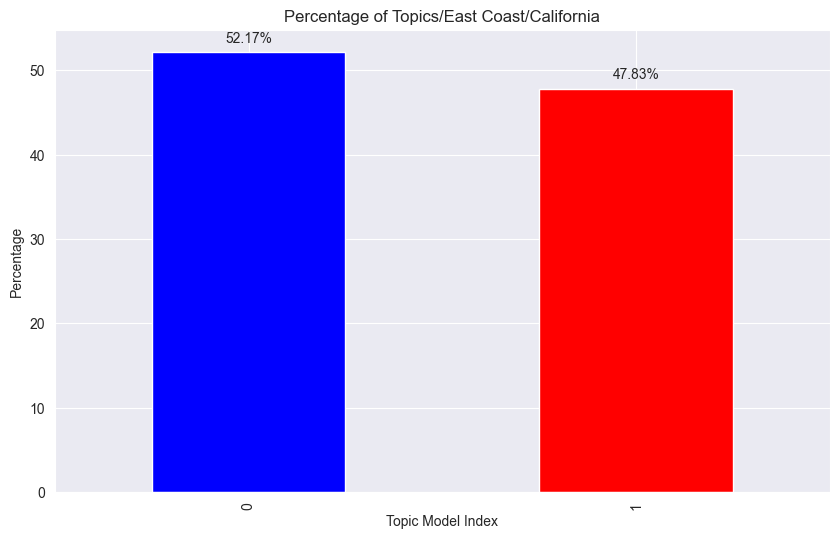

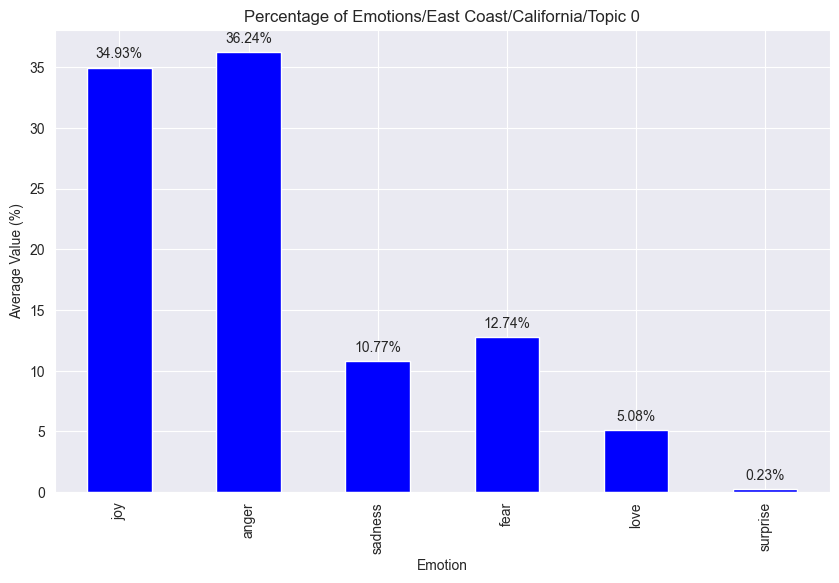

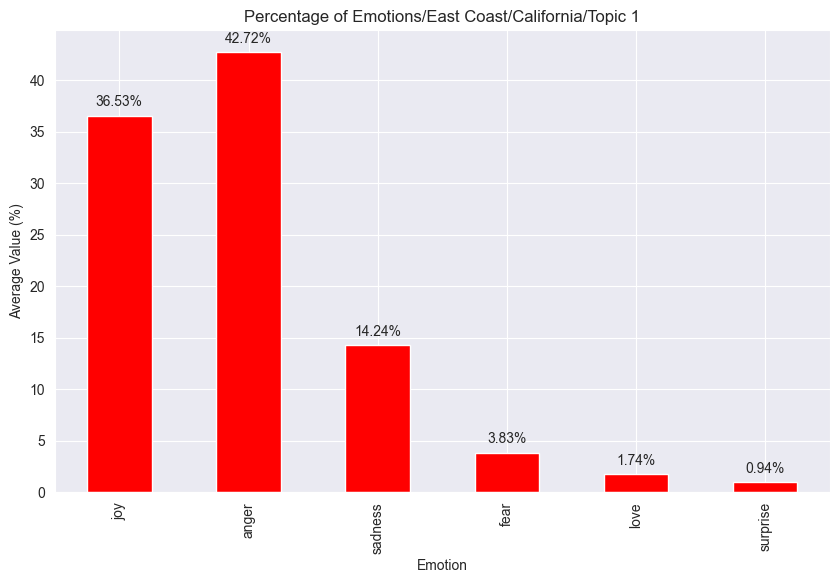

In [94]:
entity = ['California']
plot_connected_infos(
    df_east,
    entity_indices_east,
    entity,
    [
        f'Percentage of Topics/East Coast/{entity[0]}',
        f'Percentage of Emotions/East Coast/{entity[0]}/Topic 0',
        f'Percentage of Emotions/East Coast/{entity[0]}/Topic 1'
    ],
    [
        f'topics_east_coast_{entity[0]}',
        f'topics_east_coast_{entity[0]}_topic_0',
        f'topics_east_coast_{entity[0]}_topic_1'
    ]
)

71


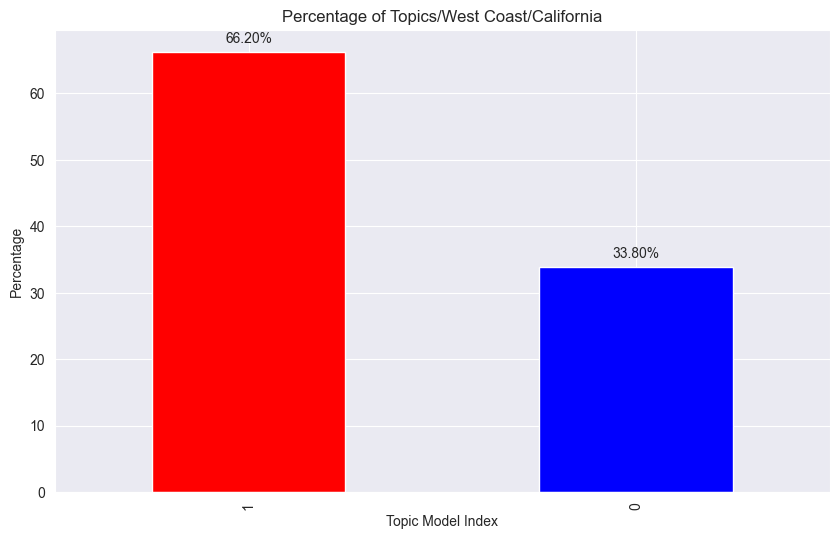

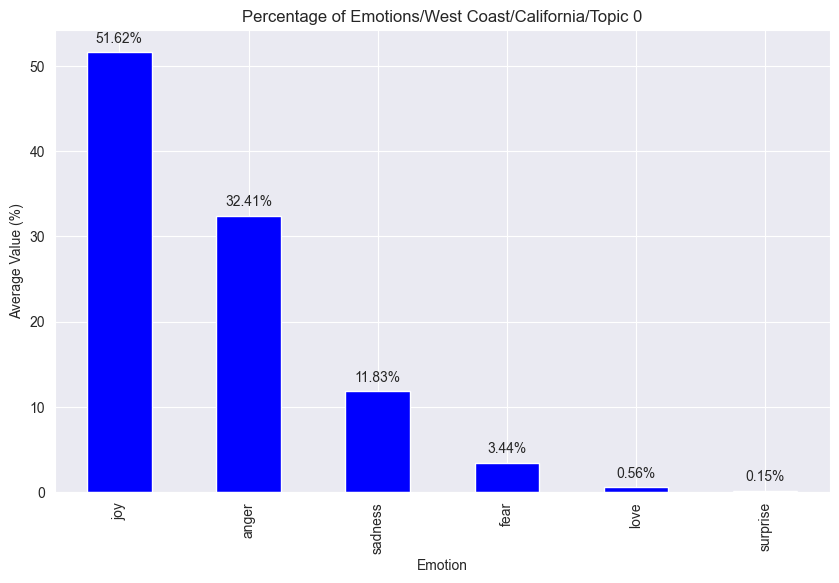

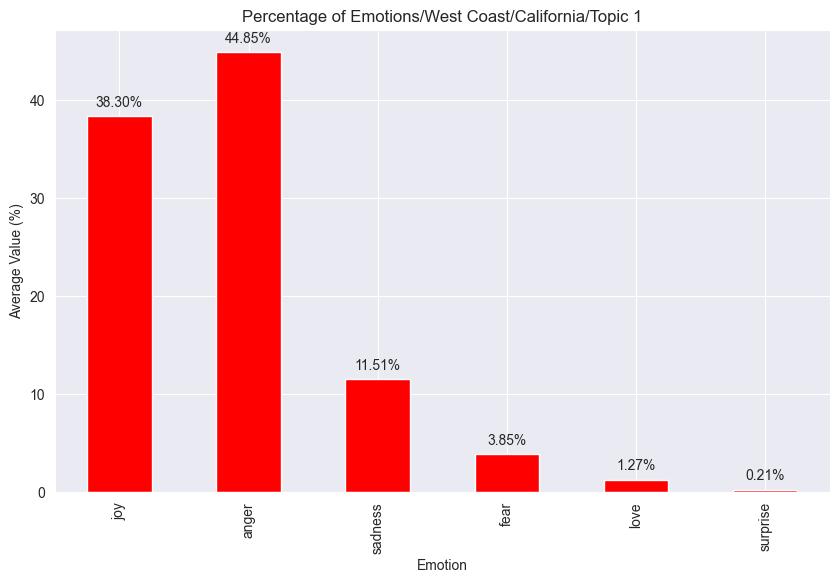

In [96]:
entity = ['California']
plot_connected_infos(
    df_west,
    entity_indices_west,
    entity,
    [
        f'Percentage of Topics/West Coast/{entity[0]}',
        f'Percentage of Emotions/West Coast/{entity[0]}/Topic 0',
        f'Percentage of Emotions/West Coast/{entity[0]}/Topic 1'
    ],
    [
        f'topics_west_coast_{entity[0]}',
        f'topics_west_coast_{entity[0]}_topic_0',
        f'topics_west_coast_{entity[0]}_topic_1'
    ]
)

In [106]:
def plot_combined_infos(df_east, df_west, entity_indices_east, entity_indices_west, search_entities, plot_titles, file_names):
    # Find entries containing the search entities in both dataframes
    subset_df_east = find_entries_containing_entities(df_east, entity_indices_east, search_entities)
    subset_df_west = find_entries_containing_entities(df_west, entity_indices_west, search_entities)
    emotion_columns = ['joy', 'anger', 'sadness', 'fear', 'love', 'surprise']

    # Combine East and West dataframes
    subset_df_east['Region'] = 'East Coast'
    subset_df_west['Region'] = 'West Coast'
    combined_df = pd.concat([subset_df_east, subset_df_west])

    # Plot the percentage of Topic Model Index for both regions
    topic_model_counts_east = subset_df_east['Topic Model Index'].value_counts(normalize=True) * 100
    topic_model_counts_west = subset_df_west['Topic Model Index'].value_counts(normalize=True) * 100

    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.35
    index = topic_model_counts_east.index

    ax.bar(index, topic_model_counts_east, bar_width, label='East Coast', color='red')
    ax.bar(index + bar_width, topic_model_counts_west, bar_width, label='West Coast', color='blue')

    ax.set_xlabel('Topic Model Index')
    ax.set_ylabel('Percentage')
    ax.set_title(plot_titles[0])
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(index)
    ax.legend()

    for i, v in enumerate(topic_model_counts_east):
        ax.text(i, v + 1, f"{v:.2f}%", ha='center')
    for i, v in enumerate(topic_model_counts_west):
        ax.text(i + bar_width, v + 1, f"{v:.2f}%", ha='center')

    plt.savefig(file_names[0])
    plt.show()

    # Plot the average values of emotions for both Topic Model Index 0
    subset_df_topic_0_east = subset_df_east[subset_df_east['Topic Model Index'] == 0]
    subset_df_topic_0_west = subset_df_west[subset_df_west['Topic Model Index'] == 0]

    avg_emotions_topic_0_east = subset_df_topic_0_east[emotion_columns].mean() * 100
    avg_emotions_topic_0_west = subset_df_topic_0_west[emotion_columns].mean() * 100

    fig, ax = plt.subplots(figsize=(10, 6))

    index = range(len(emotion_columns))

    ax.bar(index, avg_emotions_topic_0_east, bar_width, label='East Coast', color='red')
    ax.bar([i + bar_width for i in index], avg_emotions_topic_0_west, bar_width, label='West Coast', color='blue')

    ax.set_xlabel('Emotion')
    ax.set_ylabel('Average Value (%)')
    ax.set_title(plot_titles[1])
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(emotion_columns)
    ax.legend()

    for i, v in enumerate(avg_emotions_topic_0_east):
        ax.text(i, v + 1, f"{v:.2f}%", ha='center')
    for i, v in enumerate(avg_emotions_topic_0_west):
        ax.text(i + bar_width, v + 1, f"{v:.2f}%", ha='center')

    plt.savefig(file_names[1])
    plt.show()

    # Plot the average values of emotions for both Topic Model Index 1
    subset_df_topic_1_east = subset_df_east[subset_df_east['Topic Model Index'] == 1]
    subset_df_topic_1_west = subset_df_west[subset_df_west['Topic Model Index'] == 1]

    avg_emotions_topic_1_east = subset_df_topic_1_east[emotion_columns].mean() * 100
    avg_emotions_topic_1_west = subset_df_topic_1_west[emotion_columns].mean() * 100

    fig, ax = plt.subplots(figsize=(10, 6))

    index = range(len(emotion_columns))

    ax.bar(index, avg_emotions_topic_1_east, bar_width, label='East Coast', color='red')
    ax.bar([i + bar_width for i in index], avg_emotions_topic_1_west, bar_width, label='West Coast', color='blue')

    ax.set_xlabel('Emotion')
    ax.set_ylabel('Average Value (%)')
    ax.set_title(plot_titles[2])
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(emotion_columns)
    ax.legend()

    for i, v in enumerate(avg_emotions_topic_1_east):
        ax.text(i, v + 1, f"{v:.2f}%", ha='center')
    for i, v in enumerate(avg_emotions_topic_1_west):
        ax.text(i + bar_width, v + 1, f"{v:.2f}%", ha='center')

    plt.savefig(file_names[2])
    plt.show()

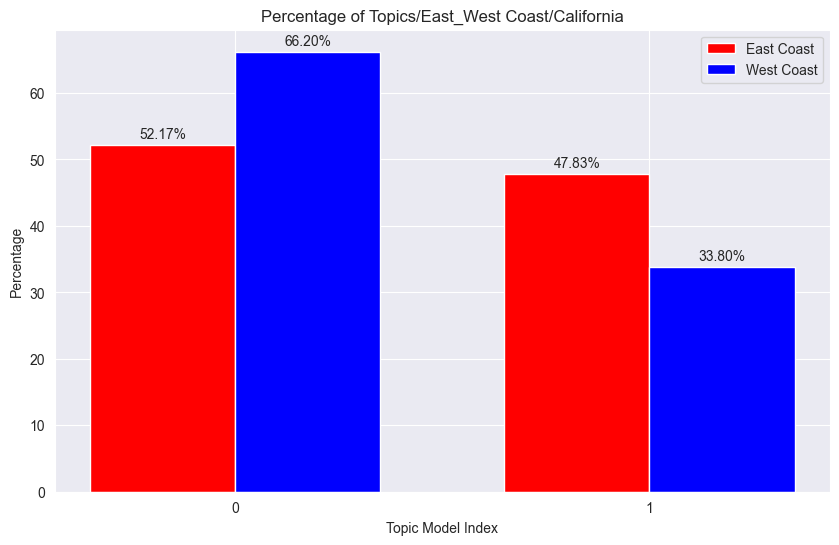

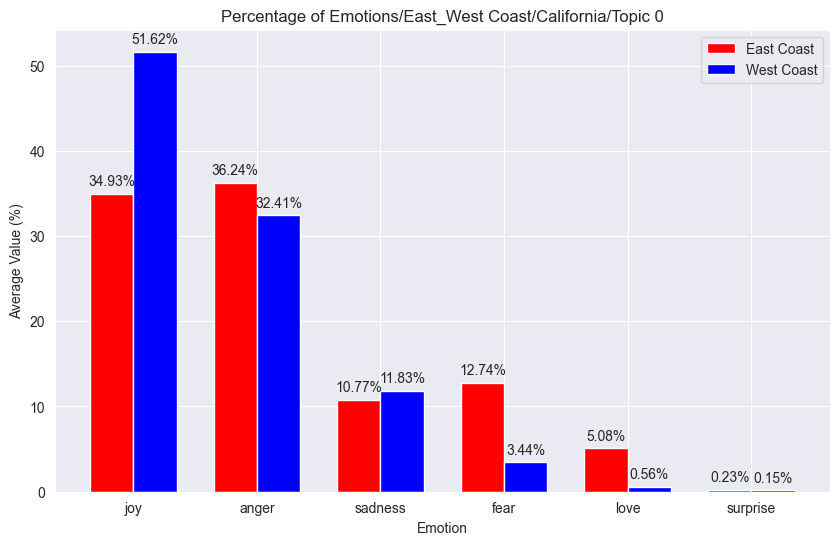

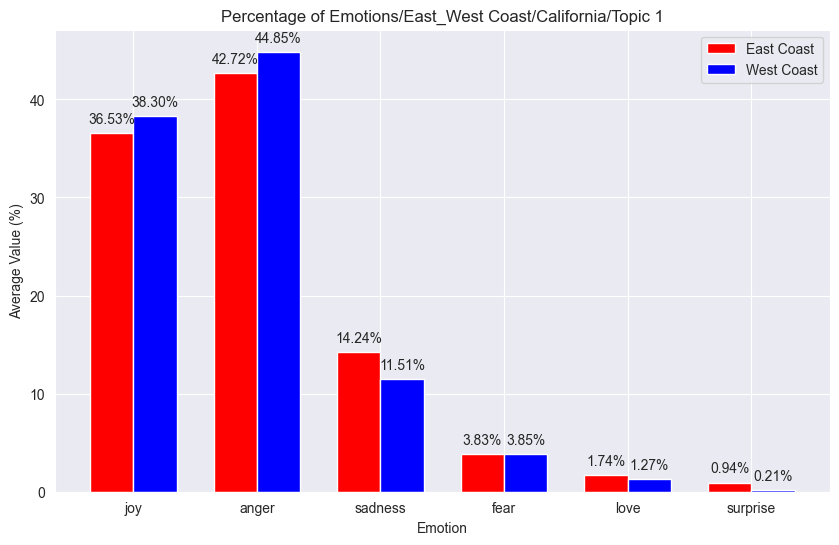

In [109]:
entity = ['California']
plot_combined_infos(
    df_east,
    df_west,
    entity_indices_east,
    entity_indices_west,
    entity,
    [
        f'Percentage of Topics/East_West Coast/{entity[0]}',
        f'Percentage of Emotions/East_West Coast/{entity[0]}/Topic 0',
        f'Percentage of Emotions/East_West Coast/{entity[0]}/Topic 1'
    ],
    [
        f'topics_east_west_coast_{entity[0]}',
        f'topics_east_west_coast_{entity[0]}_topic_0',
        f'topics_east_west_coast_{entity[0]}_topic_1'
    ]
)

In [137]:
def plot_top_person_entities(most_common_east, most_common_west):
    # Extract top person entities and their counts
    top_persons_east = {entity: count for entity, count in most_common_east.get('PER', [])[:1]}
    top_persons_west = {entity: count for entity, count in most_common_west.get('PER', [])[:1]}

    # Calculate total counts for each coast
    total_east = sum(count for entity, count in most_common_east.get('PER', []))
    total_west = sum(count for entity, count in most_common_west.get('PER', []))

    # Combine the data into a DataFrame for plotting
    data = []
    for entity, count in top_persons_east.items():
        percentage = (count / total_east) * 100 if total_east > 0 else 0
        data.append({'Entity': entity, 'Count': count, 'Percentage': percentage, 'Coast': 'East'})
    for entity, count in top_persons_west.items():
        percentage = (count / total_west) * 100 if total_west > 0 else 0
        data.append({'Entity': entity, 'Count': count, 'Percentage': percentage, 'Coast': 'West'})

    df_plot = pd.DataFrame(data)

    # Plot the data
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Entity', y='Count', hue='Coast', data=df_plot, palette={'East': 'blue', 'West': 'red'})
    plt.title('Most Popular Person Entity in East Coast and West Coast')
    plt.xticks(rotation=45)

    # Add count and percentage labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

    plt.show()

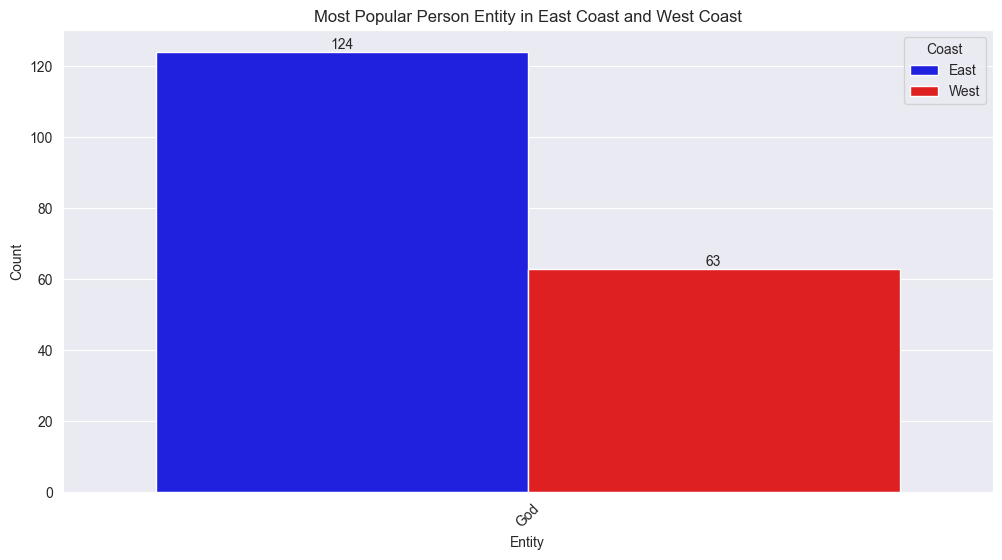

In [138]:
plot_top_person_entities(most_common_by_type_east, most_common_by_type_west)

In [6]:
def plot_top_location_entities(most_common_east, most_common_west):
    # Extract top person entities and their counts
    top_persons_east = {entity: count for entity, count in most_common_east.get('LOC', [])[:10]}
    top_persons_west = {entity: count for entity, count in most_common_west.get('LOC', [])[:10]}

    # Calculate total counts for each coast
    total_east = sum(count for entity, count in most_common_east.get('LOC', []))
    total_west = sum(count for entity, count in most_common_west.get('LOC', []))

    # Combine the data into a DataFrame for plotting
    data = []
    for entity, count in top_persons_east.items():
        percentage = (count / total_east) * 100 if total_east > 0 else 0
        data.append({'Entity': entity, 'Count': count, 'Percentage': percentage, 'Coast': 'East'})
    for entity, count in top_persons_west.items():
        percentage = (count / total_west) * 100 if total_west > 0 else 0
        data.append({'Entity': entity, 'Count': count, 'Percentage': percentage, 'Coast': 'West'})

    df_plot = pd.DataFrame(data)

    # Plot the data
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Entity', y='Count', hue='Coast', data=df_plot, palette={'East': 'blue', 'West': 'red'})
    plt.title('Most Popular Person Entity in East Coast and West Coast')
    plt.xticks(rotation=45)

    # Add count and percentage labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

    plt.show()

In [7]:
plot_top_location_entities(most_common_by_type_east, most_common_by_type_west)

NameError: name 'most_common_by_type_east' is not defined

In [16]:
def populate_locations_by_coast(df):
    locations_by_coast = defaultdict(list)

    for index, row in df.iterrows():
        if isinstance(row['Named_Entities'], list):
            for entity in row['Named_Entities']:
                if entity['type'] == 'LOC' and entity['score'] > 0.5:  # Assuming 'LOC' is the type for locations
                    locations_by_coast[row['Coast']].append(entity['entity'])

    return locations_by_coast

In [17]:
locations_by_coast = populate_locations_by_coast(df)

# Convert the dictionary to a DataFrame for easier handling
location_data = []
for coast, locations in locations_by_coast.items():
    for location in locations:
            location_data.append({'Coast': coast, 'Location': location})

location_df = pd.DataFrame(location_data)

In [18]:
location_df

,Coast,Location
0,east_coast,New York
1,east_coast,California
2,east_coast,New York
3,east_coast,Canada
4,east_coast,N
...,...,...
1600,west_coast,Phil
1601,west_coast,Phil
1602,west_coast,Compton
1603,west_coast,L


In [20]:
# Save the DataFrame to an Excel file
location_df.to_excel('locations_by_coast.xlsx', index=False)